# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

**Task 1: Data Validation & Cleaning**

In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
import plotly.express as px
import seaborn as sns
df = pd.read_csv("product_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Prior to cleaning this dataset, there were 15,000 rows & 8 columns.

In [797]:
# Shape before cleaning
df.shape

(15000, 8)

In [798]:
# Revenue column is the only one missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [799]:
# Viewing head of Table
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


There were 1,074 missing values in the Revenue column. I dropped the values in the next entry. This changes the shape of the table to 13,926 rows and 8 columns.

In [800]:
# Removing missing values from columns
df.dropna(inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [801]:
# Checking Table Values / Need to fix "Sales_Method" as there are some dupes
print(df['sales_method'].unique())
print(df['state'].unique())
print(df['week'].unique())

['Email + Call' 'Call' 'Email' 'em + call' 'email']
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
[6 5 3 4 1 2]


In [802]:
# Shape after cleaning & dropping missing values in Revenue column
df.shape

(13926, 8)

In [803]:
# When printing unique values in the sales_method column -> 
# there are some duplicates i.e 'em + call' & 'email' need to be fixed.

df.loc[df.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method == 'email', 'sales_method'] = 'Email'
print(f'\nEnsuring that there are only 3 options in the sales_methods column after amending: {df.sales_method.unique()}')


Ensuring that there are only 3 options in the sales_methods column after amending: ['Email + Call' 'Call' 'Email']


I have realigned those with 'em + call' to the 'Email + Call' option and those with 'email' to 'Email' respectively.

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [805]:
# Checking the values in the years as customer column
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

In [806]:
# Checking for customers that have 'years_as_customer' longer than 39 Years
df[df['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [807]:
# Dropping rows that are outliers i.e longer than 39 'years_as_customer'
df.drop(df[df['years_as_customer'] > 39].index, axis=0, inplace=True)

# Checking to see that they've been removed
df[df['years_as_customer'] > 39]

# Verifying the outliers in 'years_as_customer' have been removed
df['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64

In [808]:
# Checking the breakdown of values across State column
df['state'].value_counts().sort_index()

Alabama            202
Alaska              35
Arizona            295
Arkansas           118
California        1737
Colorado           212
Connecticut        167
Delaware            27
Florida            826
Georgia            460
Hawaii              67
Idaho               59
Illinois           576
Indiana            327
Iowa               154
Kansas             129
Kentucky           202
Louisiana          213
Maine               60
Maryland           245
Massachusetts      270
Michigan           466
Minnesota          228
Mississippi        133
Missouri           286
Montana             43
Nebraska            86
Nevada              97
New Hampshire       48
New Jersey         402
New Mexico          79
New York           899
North Carolina     430
North Dakota        25
Ohio               520
Oklahoma           184
Oregon             214
Pennsylvania       553
Rhode Island        41
South Carolina     213
South Dakota        38
Tennessee          308
Texas             1109
Utah       

In [809]:
# Number of States included
df.state.nunique()

50

In [810]:
# View of Dataset before moving to Analysis
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [811]:
# Final Shape
df.shape

(13924, 8)

**Summary of Data Validation**:
Prior to cleaning, there were 15000 rows and 8 columns in this dataset. Here is a summary of each column:

1. week: Week is made up of 6 integers, 1-6. There are no more than 6 values in this column so it matches the description and no cleaning is need.
2. sales_method: 5 non-unique values with no missing values in the column. There were entries that included "em + call" and "email" which I substituted the originally given values of "Email + Call" and "Email" for respectively. After doing this,there are now only 3 options in sales_method ('Call + Email', 'Call', & 'Email'), which aligns with the given description.
3. customer_id: 15000 unique customer ids without missing values, matching given description.
4. nb_sold: numeric values without missing values. matches description, no cleaning needed
5. revenue: there were 1,074 missing values in the revenue column that were dropped from the dataset.
6. years_as_customer: There were 2 outliers in the years_as_customer column. As a business, Pens and Printers has only been around for ~39 years, so those with values of 47 & 63 in this column, needed to be removed as they were outliers and likely bad data. I dropped those 2 rows as seen above.
7. nb_site_visits: Numeric values, none missing, already in integer format so doesn't need to be cleaned.
8. state: Character values without missing values, 50 unique values. Does not need cleaning.
**After cleaning this dataset, there are now 13,924 rows and 8 columns, this is due to us dropping those with missing rows in the revenue column as well as dropping the two extreme outliers in the 'years_as_customer' column.**

**Task 2: Exploratory Analysis**
1. How many customers were there for each approach?

In [812]:
# Importing Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [813]:
# Checking how many customers for each approach
df['sales_method'].value_counts()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

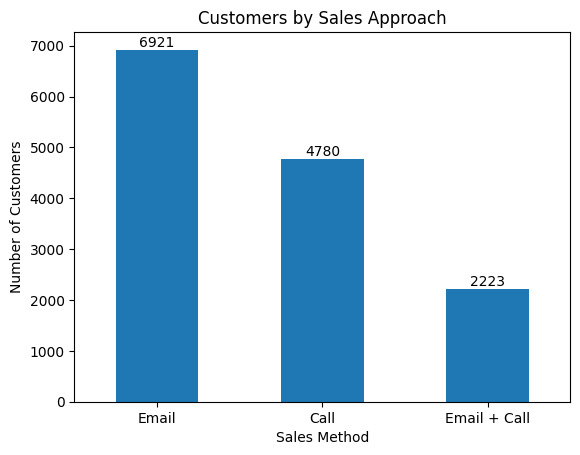

In [814]:
#Plotting number of customers for Each Sales Approach
ax = df.sales_method.value_counts().plot(kind="bar")
ax.set_title("Customers by Sales Approach")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)
plt.xticks(rotation=0)
plt.show()

**The most sales were made through email (6,921), followed by call(4,780) and email + call(2,223) respectively. Results shown in graph above. I added in specific labels for each bar so that the differences in amounts could be calculated and analyzed more quickly. From the graph, we can quickly understand the results I mentioned.**

2. What does the spread of revenue look like overall? And for each method?

In [815]:
# Importing Libraries and Defining Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(data, x_arg, y_arg, title, x_label, y_label):
    sns.boxplot(data=data, x=x_arg, y=y_arg)
    
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    sns.despine()
    plt.show()

In [816]:
# Defining Histogram

def hist_plot(data, x_arg, title, x_label, y_label, bin_size):
    
    sns.histplot(data=data, x=x_arg, bins=bin_size)
    
    # set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
  
    sns.despine()
    plt.show()

In [817]:
# Defining Univariate Plot function

def plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_):
    
    if kind == sns.lineplot:
        kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color, marker = marker_)
        plt.title(title, size=12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        
    elif kind == sns.barplot:
        ax = kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title, size=12, weight='bold')
        plt.xlabel(x_label, size=10, weight='bold')
        plt.ylabel(y_label, size=10, weight='bold')
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/data['revenue'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1),
                        ha = 'left', va='bottom', size='12')
            
    else:
        kind(data=data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title,size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')

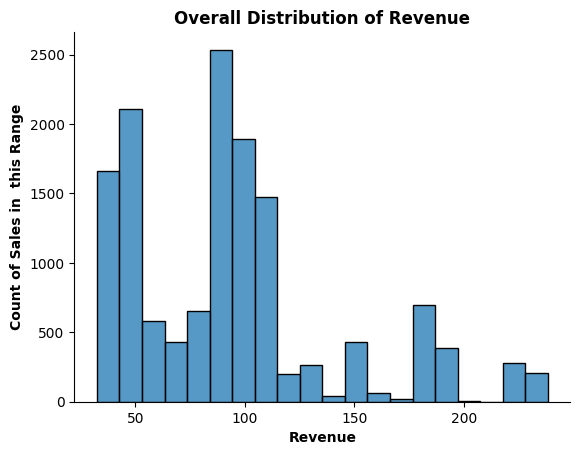

In [818]:
# Creating a Histogram to Visualize the Overall Spread of Revenue
hist_plot(data=df, x_arg='revenue', title = 'Overall Distribution of Revenue', x_label='Revenue', y_label= 'Count of Sales in  this Range',bin_size=20)

**From the histogram above, we can see that most of the sales fell between the 50-90 range, and the distribution was most concentrated between 60-90 specifically.**

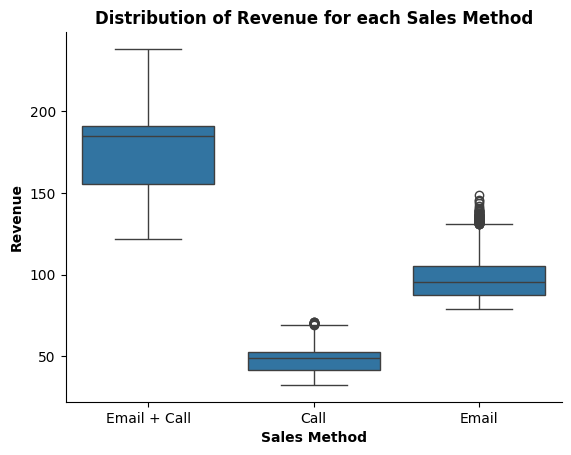

In [819]:
# Creating a Box Plot to Display the Spread of Revenue for Each Sales Method
box_plot(
    data=df, x_arg='sales_method', y_arg='revenue', title='Distribution of Revenue for each Sales Method', x_label='Sales Method', y_label= 'Revenue')

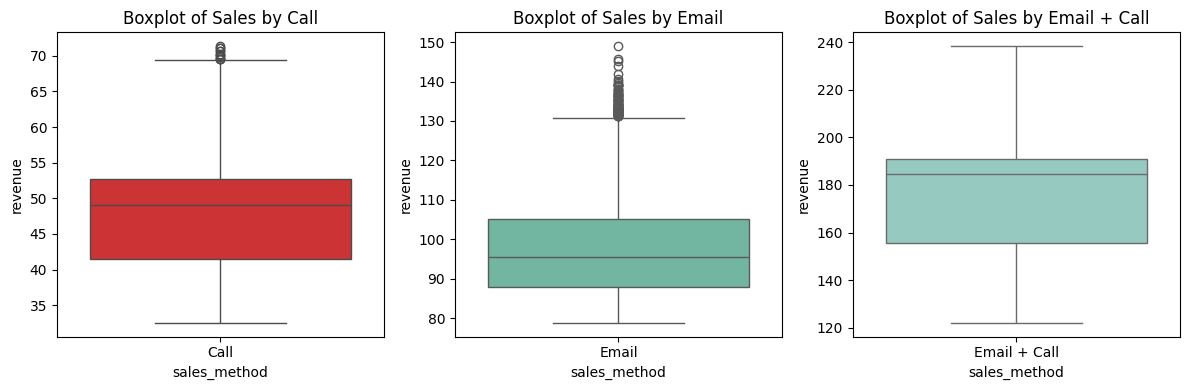

In [820]:
# Boxplots for breakdown of sales by Each Approach
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Call'], ax=axes[0], palette='Set1')
axes[0].set_title('Boxplot of Sales by Call')
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email'], ax=axes[1], palette='Set2')
axes[1].set_title('Boxplot of Sales by Email')
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email + Call'], ax=axes[2], palette='Set3')
axes[2].set_title('Boxplot of Sales by Email + Call')
fig.tight_layout()
plt.show()


**From these side-by-side boxplots, we can tell Calls were the least productive by looking at the range of revenue amounts for the "Call" sales method, only being from ~40-70 which is much lower than either of the other sales methods. Very clearly we can see why Calls were responsible up such a minor percentage of total revenue. The spread of the revenue for each method can be observed above.

From the graph below, we can see that Calls were the lowest revenue generating activity, making up only about 18% of the total revenue produced during this period. Followed by Email + Call, accounting for roughly 31% of revenue, and Email which was responsible for about 53% of revenue. The spread of the revenue is displayed throughout the include charts.**

In [832]:
group_approach = df.groupby('sales_method')['revenue'].sum().sort_values()
print(f"Revenue generated per approach:\n{group_approach}")
#plot(sns.barplot, df, group_approach.index, group_approach, None, 'Total Revenue by Sales Method',
#     'Sales Method', 'Total Revenue', sns.color_palette()[0], None)


Revenue generated per approach:
sales_method
Call            227513.02
Email + Call    408256.69
Email           672220.61
Name: revenue, dtype: float64


3. Was there any difference in revenue over time for each of the methods?

week  sales_method
1     Call             26159.18
      Email           229765.55
      Email + Call     16885.33
2     Call             33792.02
      Email           137794.35
      Email + Call     26376.23
3     Call             36247.27
      Email            98792.14
      Email + Call     48737.14
4     Call             49543.52
      Email           107788.37
      Email + Call     78296.20
5     Call             53518.11
      Email            74373.45
      Email + Call    126809.72
6     Call             28252.92
      Email            23706.75
      Email + Call    111152.07
Name: revenue, dtype: float64


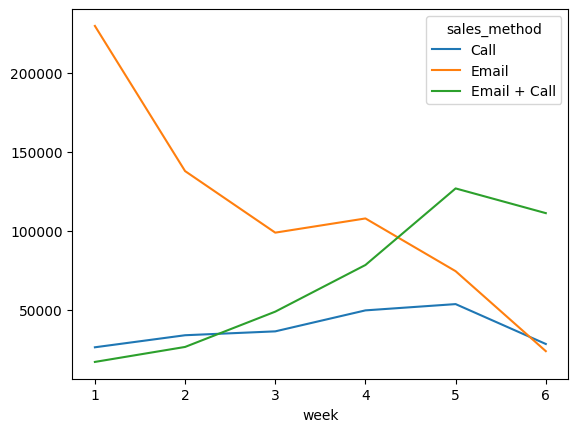

In [822]:
rev_sum = df.groupby(['week', 'sales_method'])['revenue'].sum()
rev_sum.unstack().plot()
print(rev_sum)

By plotting the data on a line graph, we can see that the Email sales method produced the highest amount of revenue in Week 1 as started with it's highest value of 229765.55 and only decreased as the weeks went on. Over the following 2 weeks, the revenue generated from the email approach slumped by over 58% down to less than 100k at 98,792 USD. We can also see that while the Email + Call started much lower than the pure emailing approach, it ended the period higher than all, claiming the top spot by the end of the series. If I had to guess, it appears that this approach seems to be the most successfully and I would be confident recommending this as a focus area going forward. It seemed to trend up each week rising higher than the last until week 6, but I believe it would turn around should this have been observed longer. Lastly, the pure "calling" approach started low and also ended low in terms of revenue generation. There was little to no change in the revenue generated from this approach and it seems like the way to go would be either solely Emailing, or Emailing and Calling to stay at the forefront of the customer's minds.

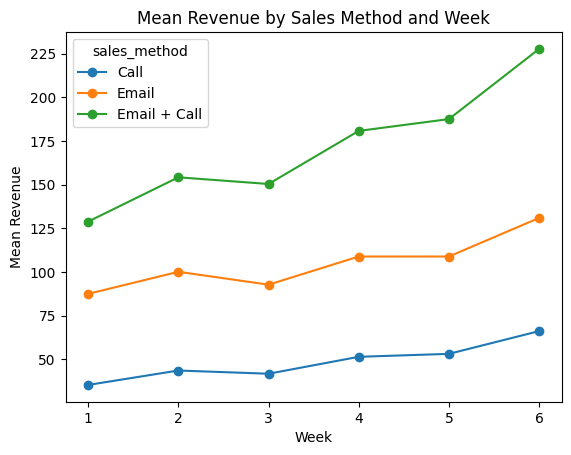

In [823]:
weekly_rev_avg = df.groupby(['week', 'sales_method'])['revenue'].mean()
weekly_rev_avg = weekly_rev_avg.unstack(level='sales_method')
weekly_rev_avg.plot(kind='line', marker='o')
plt.title('Mean Revenue by Sales Method and Week')
plt.xlabel('Week')
plt.ylabel('Mean Revenue')
plt.show()

Looking into the average revenue for each sales method by each week we can see that the mean revenue for 'Email + Call' starts in the highest spot while the 'Call' approach produced the lowest mean revenue. This continues across the following weeks with each method appearing to be trending upwards over time while remaining constant in their rankings. Overall, Email + Call produced the highest mean revenue over time, with Email, then Call following respectively.

4. Based on the Data, which method would you recommend we continue to use?

In [824]:
# avg weekly revenue for each sales method
df.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,47.596866
Email,97.127671
Email + Call,183.651233


Based on the data and charts above, I would recommend that this organization pivots away from using the calling approach on it's own as it appears to be producing the worst results out of all of the sales methods. The blue line indicates the minimal ROI of a Call heavy approach. Additionally, the 'call' approach is seen to be a very time intensive approach, as the avg time spent on the phone was roughly ~30 min per customer. Calling could easily be supplemented by adding emails that provide and share key insights about the product, and this required little work from the team. Because of this, I recommend the team doubles down on the Call + Email approach.

As we can see from the graphs, the 'Email + Call' approach seems to be working really well and so I would recommend the business focuses on that outreach to remain relevant and timely while also decreasing the amount of time spent on the sales method. The ROI for Email + Call can be seen on both the graphs as it appears to trend upward on both avg weekly revenue and total weekly revenue over time. Focus on Email + Calling! If possible focus on Email + Call, and then Email alone but try to steer clear of the "Call" only approach - it's shown poor results and also takes a ton of time away from the team. The call time for the 'email + call' approach was also only 10 minutes compared to the 30 minutes spent on the phone with the 'call' only method - another reason why this should be the main approach.

5. Business Metric to Monitor

In [827]:
# Pivot Table of Mean & Median for each Sales Method across the 6 week period
df.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient(cmap='viridis')

In [830]:
# Highlighting the maximum amounts for each week
df.groupby(['week', 'sales_method'])['revenue'].agg(['mean']).unstack().style.highlight_max(axis=1, color='lightgreen')

Because the company is focused on increasing revenue and profits by selling more products, I would suggest they focus on the metric of average weekly revenue generated from each method as their main performance indicator.

I think this would be the best metric to focus on because it can be measured over time and can be analyzed regularly on a weekly basis, which will also allow them to pivot should results and sales not fall in line with their goal. In the highlighted pivot table, we can clearly see that each week, the 'Email + Call' approach was producing significantly higher average revenue than the other approaches.

By looking at the weekly average revenue per sales method, we can see that the 'Email + Call' approach typically trended upwards week over week, with only a slight decline between week 2 and 3, and that was completely made up in the following weeks. The Email approach followed behind, rising to an average of roughly $130/sale in week 6, but this doesn't come close to the results observed from 'Email + Call'.

The estimates for inital values of this metric (Weekly Avg Revenue per Sales Method) with a focus on the recommended approach (Email + Call) are 128.89, 154.24, 150.42, 180.82, 187.58, and 227.77 for weeks 1-6 respectively.
By analyzing this suggested metric of average weekly revenue per sales method, we could observe if this trend continues for the three different approaches.

**6. Final Summary & Recommendations**

Based on the analysis above, I want to share a few key recommendations that could help to optimize business performance.

1. First, I recommend the company increases the focus on the 'Email + Call' method because of the success it displayed in total average revenue generated per sale ($183 USD/sale) as well as the fact that it showed a consistent increase across most weeks, only decreasing slightly between weeks 2 and 3. This approach showed significantly higher results than the other approaches. It also only included phone time on average of 10 minutes per customer, much lower than the 'call' only approach.
2. Next, because Email also displayed somewhat positive results that trended upwards across the 6 week period, I would suggest the company conveys stronger value in messages with more targeted emails into their strategy as this could be a way to add some extra revenue to the pipeline with little to no extra effort and a light lift on their end.
3. I would recommend the team focuses on the metric of average revenue generated on a weekly basis for each sales method as this can be measured over time, allowing trends to appear and be analyzed to predict future outcomes. Specifically, I would suggest they drill down on the two most successful approaches ('Email' and 'Email + Call') Once implemented for a certain period of time, this could be a way for the company to decide if they should quickly pivot when results or future forecasts are not falling in line with their revenue goals.
4. I would suggest that the team decreases the focus on the 'Call' method because it showed poor results that were significantly lower than the other approaches, on a week over week basis. In addition its a time intensive approach that didn't seem to be worth the extra effort and time that was required (30 min phone time per customer). The team should really be focusing on the other two approaches to truly optimize performance, and this will likely lead to increased total revenue.
5. Improve Data Collection practices - There were 1074 missing values in the revenue column and this missing information could be the difference between achieving their goals or falling short. I dropped all rows that had missing revenue amounts because I felt that would be the best way to account for these missing values.
6. There were also some values in the years as customer column that would be considered outliers, they had values that were higher than 39 (total number of years the company has been around), including values of 47 and 63, which simply did not fit in the dataset so I dropped them too. Going forward I would suggest the team ensures that this information is correct and doesn't include bad data like this.

To summarize, I feel that this company should use a multi channel approach to reach their sales goals. Email + Call showed a significantly higher return on time invested and this information could help the company optimize operations to increase performance and revenue generation. I also think a follow up call a day or two after the product information email could go a long way in converting sales. Given my experience in sales, waiting a week or so to make a call often leads to less pick ups or people not remembering the email. It's important to be prompt and try to get timing on your side for these kinds of things. With the right efforts and focus in the proven approaches, the team can rise above the competition and break through the noise!

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation